# Buenos Aires Pricing Analysis

## Introduction 

In this project I have scraped data from various data about Buenos Aires Real Estate price. Then I used Foursquare API to get the common venues of the neighborhoods.Then using K-means clustering I clustered Buenos Aires Neighborhoods on the basis of the common venues.

## Importing Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:
df_BuenosAires = pd.read_excel('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/terrenos-valor-de-oferta/precio-de-terrenos-2018.xlsx')
df_BuenosAires.head()

,operacion,tipo,long,lat,m2total,direccion,calle,altura,cambio,preciotex,preciousd,precioars,preciousdm,precioarsm,barrio,comuna,codigo_postal,codigo_postal_argentino
0,VTA,TERRENO,-58.414071,-34.618214,320.0,Agrelo 3399,Agrelo,3399.0,37.2,U$S 330000,330000,12276000,1031.250000,38362.500000,ALMAGRO,5,1224.0,C1224ABE
1,VTA,TERRENO,-58.424566,-34.610097,320.0,Bartolome Mitre y Gascon,Bartolome Mitre y Gascon,NaN,37.2,U$S 690000,690000,25668000,2156.250000,80212.500000,ALMAGRO,5,NaN,NaN
2,VTA,TERRENO,-58.424486,-34.613659,174.0,Don Bosco,Don Bosco,NaN,37.2,U$S 380000,380000,14136000,2183.908046,81241.379310,ALMAGRO,5,NaN,NaN
3,VTA,TERRENO,-58.423651,-34.614752,650.0,Hipolito Irigoyen 4043,Hipolito Irigoyen,4043.0,37.2,U$S 1000000,1000000,37200000,1538.461538,57230.769231,ALMAGRO,5,NaN,NaN
4,VTA,TERRENO,-58.413725,-34.603124,283.0,HUMAHUACA 3400,HUMAHUACA,3400.0,37.2,U$S 850000,850000,31620000,3003.533569,111731.448763,ALMAGRO,5,1191.0,C1191ABB


In [3]:
df_BuenosAires.columns

Index(['operacion', 'tipo', 'long', 'lat', 'm2total', 'direccion', 'calle',
       'altura', 'cambio', 'preciotex', 'preciousd', 'precioars', 'preciousdm',
       'precioarsm', 'barrio', 'comuna', 'codigo_postal',
       'codigo_postal_argentino'],
      dtype='object')

In [4]:
df_BuenosAires.columns = ['operacion', 'tipo', 'long', 'lat', 'm2total', 'direccion', 'calle',
       'altura', 'cambio', 'preciotex', 'preciousd', 'precioars', 'preciousdm',
       'precioarsm', 'barrio', 'comuna', 'codigo_postal',
       'codigo_postal_argentino']
df_BuenosAires.head()

,operacion,tipo,long,lat,m2total,direccion,calle,altura,cambio,preciotex,preciousd,precioars,preciousdm,precioarsm,barrio,comuna,codigo_postal,codigo_postal_argentino
0,VTA,TERRENO,-58.414071,-34.618214,320.0,Agrelo 3399,Agrelo,3399.0,37.2,U$S 330000,330000,12276000,1031.250000,38362.500000,ALMAGRO,5,1224.0,C1224ABE
1,VTA,TERRENO,-58.424566,-34.610097,320.0,Bartolome Mitre y Gascon,Bartolome Mitre y Gascon,NaN,37.2,U$S 690000,690000,25668000,2156.250000,80212.500000,ALMAGRO,5,NaN,NaN
2,VTA,TERRENO,-58.424486,-34.613659,174.0,Don Bosco,Don Bosco,NaN,37.2,U$S 380000,380000,14136000,2183.908046,81241.379310,ALMAGRO,5,NaN,NaN
3,VTA,TERRENO,-58.423651,-34.614752,650.0,Hipolito Irigoyen 4043,Hipolito Irigoyen,4043.0,37.2,U$S 1000000,1000000,37200000,1538.461538,57230.769231,ALMAGRO,5,NaN,NaN
4,VTA,TERRENO,-58.413725,-34.603124,283.0,HUMAHUACA 3400,HUMAHUACA,3400.0,37.2,U$S 850000,850000,31620000,3003.533569,111731.448763,ALMAGRO,5,1191.0,C1191ABB


## Cleaning the table

The table contains hyperlinks numbers and there are more than one Postal codes so I decided to keep one.

In [5]:
df_BsAs = df_BuenosAires.drop(['operacion', 'tipo', 'direccion', 'calle',
       'altura', 'cambio', 'preciotex', 'preciousd', 'preciousdm',
       'precioarsm', 'codigo_postal_argentino'], axis=1)
df_BsAs.head()

,long,lat,m2total,precioars,barrio,comuna,codigo_postal
0,-58.414071,-34.618214,320.0,12276000,ALMAGRO,5,1224.0
1,-58.424566,-34.610097,320.0,25668000,ALMAGRO,5,NaN
2,-58.424486,-34.613659,174.0,14136000,ALMAGRO,5,NaN
3,-58.423651,-34.614752,650.0,37200000,ALMAGRO,5,NaN
4,-58.413725,-34.603124,283.0,31620000,ALMAGRO,5,1191.0


In [6]:
df_BsAs['barrio'].replace('', np.nan, inplace=True)
df_BsAs['comuna'].replace('', np.nan, inplace=True)
df_BsAs['codigo_postal'].replace('', np.nan, inplace=True)
df_BsAs['m2total'].replace('', np.nan, inplace=True)
df_BsAs['precioars'].replace('', np.nan, inplace=True)

In [7]:
df_BsAs.dropna(subset=['barrio'], inplace=True)
df_BsAs.dropna(subset=['comuna'], inplace=True)
df_BsAs.dropna(subset=['codigo_postal'], inplace=True)
df_BsAs.dropna(subset=['m2total'], inplace=True)
df_BsAs.dropna(subset=['precioars'], inplace=True)

In [8]:
df_BsAs.head()

,long,lat,m2total,precioars,barrio,comuna,codigo_postal
0,-58.414071,-34.618214,320.0,12276000,ALMAGRO,5,1224.0
4,-58.413725,-34.603124,283.0,31620000,ALMAGRO,5,1191.0
5,-58.421962,-34.607290,296.0,27900000,ALMAGRO,5,1199.0
8,-58.414019,-34.599348,176.0,21910800,ALMAGRO,5,1186.0
9,-58.414043,-34.601189,221.0,18600000,ALMAGRO,5,1173.0


In [9]:
df_BsAs2= df_BsAs.groupby('barrio',as_index=False).mean()
df_BsAs2['Precio Unitario'] = df_BsAs2['precioars']/df_BsAs2['m2total']
df_BsAs2

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario
0,AGRONOMIA,-58.496394,-34.594753,473.200000,2.622244e+07,15.0,1353.200000,55415.131023
1,ALMAGRO,-58.421047,-34.605220,386.354839,3.394668e+07,5.0,1309.483871,87864.006012
2,BALVANERA,-58.403610,-34.611803,555.219512,4.064640e+07,3.0,1272.463415,73207.797399
3,BARRACAS,-58.378305,-34.643250,1118.111111,3.715905e+07,4.0,1327.777778,33233.775316
4,BELGRANO,-58.456588,-34.559806,441.076923,6.176898e+07,13.0,1348.000000,140041.294210
5,BOCA,-58.363795,-34.638008,883.857143,4.723700e+07,4.0,1311.000000,53444.157104
6,BOEDO,-58.419036,-34.630797,360.800000,2.819356e+07,5.0,1279.200000,78141.790466
7,CABALLITO,-58.443060,-34.615995,501.355556,4.391917e+07,6.0,1376.933333,87600.842161
8,CHACARITA,-58.448492,-34.588377,317.411765,2.738195e+07,15.0,1344.352941,86266.326909
9,COGHLAN,-58.473478,-34.559571,373.000000,3.524752e+07,12.0,1353.000000,94497.363718


In [10]:
df_BsAs2.columns

Index(['barrio', 'long', 'lat', 'm2total', 'precioars', 'comuna',
       'codigo_postal', 'Precio Unitario'],
      dtype='object')

In [11]:
df_BsAs2.shape

(47, 8)

In [12]:
address = 'Buenos Aires'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Buenos Aires are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Buenos Aires are -34.6075682, -58.4370894.


In [13]:
# create map of Buenos Aires using latitude and longitude values
map_BsAs = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, barrio in zip(df_BsAs2['lat'], df_BsAs2['long'], df_BsAs2['barrio']):
    label = '{}'.format(barrio)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BsAs)  
    
map_BsAs

## Define Foursquare Credentials and Version

In [14]:
CLIENT_ID = 'KR3Q3KMFVRQFYT45CE4HSS2414RCPAGWDYAHQPVNT4JKXD0E' # your Foursquare ID
CLIENT_SECRET = 'THGQYHBFZC5GSURQQ5SWUIEDVT0IEJXFOMICNUSRWFYCG2HR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KR3Q3KMFVRQFYT45CE4HSS2414RCPAGWDYAHQPVNT4JKXD0E
CLIENT_SECRET:THGQYHBFZC5GSURQQ5SWUIEDVT0IEJXFOMICNUSRWFYCG2HR


In [15]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=KR3Q3KMFVRQFYT45CE4HSS2414RCPAGWDYAHQPVNT4JKXD0E&client_secret=THGQYHBFZC5GSURQQ5SWUIEDVT0IEJXFOMICNUSRWFYCG2HR&v=20180605&ll=-34.6075682,-58.4370894&radius=500&limit=100'

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f5d4abfea7d8a0a170ac746'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Caballito',
  'headerFullLocation': 'Caballito, Buenos Aires',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 26,
  'suggestedBounds': {'ne': {'lat': -34.6030681955, 'lng': -58.43163220965797},
   'sw': {'lat': -34.612068204500005, 'lng': -58.442546590342026}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b058719f964a520a07f22e3',
       'name': 'Parque Centenario',
       'location': {'address': 'Av. Ángel Gallardo',
        'crossStreet': 'e/ Av. Díaz Vélez y Av. Patricias Argentina',
        'lat': -34.60659676818088,
        'lng': -58.435463905

In [17]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Parque Centenario,Park,-34.606597,-58.435464
1,Co-Pain Boulangerie (ex-Franck Dauffouis),Bakery,-34.607693,-58.438662
2,"Museo Argentino de Ciencias Naturales ""Bernard...",Science Museum,-34.605458,-58.438039
3,Anfiteatro Eva Perón,Amphitheater,-34.605891,-58.436829
4,Estación 29 - Parque Centenario [Ecobici],Bike Rental / Bike Share,-34.608478,-58.434273


In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

26 venues were returned by Foursquare.


In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
BsAs_venues = getNearbyVenues(names=df_BsAs2['barrio'], 
                                   latitudes=df_BsAs2['lat'], 
                                   longitudes=df_BsAs2['long'], 
                                   radius=500)

AGRONOMIA
ALMAGRO
BALVANERA
BARRACAS
BELGRANO
BOCA
BOEDO
CABALLITO
CHACARITA
COGHLAN
COLEGIALES
CONSTITUCION
FLORES
FLORESTA
LINIERS
MATADEROS
MONTE CASTRO
MONTSERRAT
NUEVA POMPEYA
NUÃ‘EZ
NUâ”œÃ¦EZ
PALERMO
PARQUE AVELLANEDA
PARQUE CHACABUCO
PARQUE CHAS
PARQUE PATRICIOS
PATERNAL
RECOLETA
RETIRO
SAAVEDRA
SAN CRISTOBAL
SAN NICOLAS
SAN TELMO
VELEZ SARSFIELD
VERSALLES
VILLA CRESPO
VILLA DEL PARQUE
VILLA DEVOTO
VILLA GRAL. MITRE
VILLA LUGANO
VILLA LURO
VILLA ORTUZAR
VILLA PUEYRREDON
VILLA REAL
VILLA RIACHUELO
VILLA SANTA RITA
VILLA URQUIZA


In [22]:
print(BsAs_venues.shape)
BsAs_venues.head()

(1271, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,AGRONOMIA,-34.594753,-58.496394,Ladobueno Patisserie & Café,-34.596536,-58.498617,Coffee Shop
1,AGRONOMIA,-34.594753,-58.496394,Repostería Papá Eduvilio,-34.595906,-58.499338,Bakery
2,AGRONOMIA,-34.594753,-58.496394,Bien de Bien,-34.592322,-58.500959,Café
3,AGRONOMIA,-34.594753,-58.496394,Rancho IN,-34.595990,-58.495916,Steakhouse
4,AGRONOMIA,-34.594753,-58.496394,Slainte Irish Pub,-34.595274,-58.501534,Pub


In [23]:
BsAs_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
AGRONOMIA,22,22,22,22,22,22
ALMAGRO,37,37,37,37,37,37
BALVANERA,23,23,23,23,23,23
BARRACAS,5,5,5,5,5,5
BELGRANO,100,100,100,100,100,100
BOCA,33,33,33,33,33,33
BOEDO,12,12,12,12,12,12
CABALLITO,29,29,29,29,29,29
CHACARITA,34,34,34,34,34,34


In [24]:
print('There are {} uniques categories.'.format(len(BsAs_venues['Venue Category'].unique())))

There are 193 uniques categories.


In [25]:
# one hot encoding
BsAs_onehot = pd.get_dummies(BsAs_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
BsAs_onehot['Neighborhood'] = BsAs_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [BsAs_onehot.columns[-1]] + list(BsAs_onehot.columns[:-1])
BsAs_onehot = BsAs_onehot[fixed_columns]

BsAs_onehot.head()

,Yoga Studio,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Doctor's Office,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Service,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden Center,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Nightlife,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Radio Station,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Salad Place,Sandwich Place,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Toy / Game Store,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AGRONOMIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AGRONOMIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,AGRONOMIA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,

In [26]:
BsAs_onehot.shape

(1271, 193)

In [27]:
BsAs_grouped = BsAs_onehot.groupby('Neighborhood').mean().reset_index()
BsAs_grouped
BsAs_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Entertainment,Asian Restaurant,Astrologer,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Boutique,Breakfast Spot,Brewery,Burger Joint,Bus Station,Bus Stop,Café,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Doctor's Office,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Service,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Garden Center,Gas Station,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Other Nightlife,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Radio Station,Record Shop,Recording Studio,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Salad Place,Sandwich Place,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Soccer Field,Soccer Stadium,Social Club,South American Restaurant,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Tennis Court,Theater,Theme Restaurant,Thrift / Vintage Store,Toll Booth,Toy / Game Store,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Store,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,AGRONOMIA,0.0,0.0,0.0,0.0,0.045455,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.045455,0.181818,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.00,0.00,0.0,0.000000,0.00,0.045455,0.045455,0.000000,0.090909,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.090909,0.00,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.045455,0.00,0.00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.000000,0.045455,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00,0.090909,0.0,0.0,0.0,0.0,0.045455,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.00,0.045455,0.0,0.000000,0.0,0.00,0.0,0.00,0.045455,0.0,0.045455,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.045455,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00
1,ALMAGRO,0.0,0.0,0.0,0.0,0.081081,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027027,0.0,0.000000,0.027027,0.0,0.0,0.00,0.0,0.0,0.027027,0.00,0.0,0.00,

## Top 5 most common venues for each Neighborhood

In [28]:
num_top_venues = 5

for hood in BsAs_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = BsAs_grouped[BsAs_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AGRONOMIA----
         venue  freq
0          Bar  0.18
1          Pub  0.09
2  Coffee Shop  0.09
3         Café  0.09
4       Bakery  0.05


----ALMAGRO----
                    venue  freq
0                    Café  0.11
1             Pizza Place  0.08
2  Argentinian Restaurant  0.08
3                     Gym  0.05
4              Restaurant  0.05


----BALVANERA----
                 venue  freq
0                 Café  0.17
1          Pizza Place  0.13
2               Bakery  0.04
3  Peruvian Restaurant  0.04
4          Gas Station  0.04


----BARRACAS----
                    venue  freq
0  Argentinian Restaurant   0.2
1                   Plaza   0.2
2            Soccer Field   0.2
3                    Café   0.2
4                  Bakery   0.2


----BELGRANO----
                    venue  freq
0          Ice Cream Shop  0.07
1             Pizza Place  0.07
2             Coffee Shop  0.06
3                  Bakery  0.06
4  Argentinian Restaurant  0.05


----BOCA----
               

## Put in the Dataframe

In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create the new dataframe and display the top 10 venues for each neighborhood

In [30]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = BsAs_grouped['Neighborhood']

for ind in np.arange(BsAs_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BsAs_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AGRONOMIA,Bar,Café,Coffee Shop,Pub,Steakhouse,Bakery,Restaurant,German Restaurant,Sports Club,Ice Cream Shop
1,ALMAGRO,Café,Pizza Place,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Gym,Restaurant,Ice Cream Shop,Cheese Shop,Flower Shop,Performing Arts Venue
2,BALVANERA,Café,Pizza Place,Ice Cream Shop,BBQ Joint,Peruvian Restaurant,Rock Club,Electronics Store,Bus Stop,Fast Food Restaurant,Social Club
3,BARRACAS,Plaza,Soccer Field,Argentinian Restaurant,Bakery,Café,English Restaurant,Flower Shop,Fish Market,Fast Food Restaurant,Farmers Market
4,BELGRANO,Ice Cream Shop,Pizza Place,Bakery,Coffee Shop,Argentinian Restaurant,Café,Fast Food Restaurant,Tea Room,Bookstore,Chinese Restaurant


In [31]:
neighborhoods_venues_sorted.rename(columns = {'Neighborhood':'Location'}, inplace = True)

## Adding Average  price of each Neighborhood in the Group

Normalizing the Avg price column

In [32]:
BsAs_grouped['Price']=df_BsAs2['Precio Unitario']
v= BsAs_grouped.iloc[:, -1]
BsAs_grouped.iloc[:,-1] = (v - v.min()) / (v.max() - v.min())

# Clustering Neighborhoods

running K-means clustering for 4 clusters

In [66]:
kclusters = 5

BsAs_grouped_clustering = BsAs_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BsAs_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 4, 2, 1, 4, 1, 1, 4, 4, 4], dtype=int32)

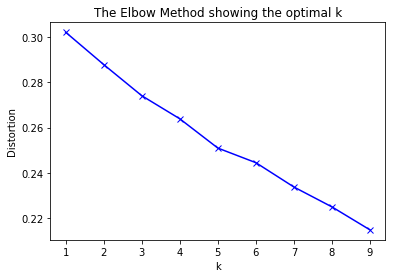

In [67]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(BsAs_grouped_clustering)
    kmeanModel.fit(BsAs_grouped_clustering)
    distortions.append(sum(np.min(cdist(BsAs_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / BsAs_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [68]:
neighborhoods_venues_sorted.drop(columns = 'Cluster Labels', inplace = True)

In [69]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

BsAs_merged = df_BsAs2

BsAs_merged = BsAs_merged.join(neighborhoods_venues_sorted.set_index('Location'), on='barrio')

BsAs_merged

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AGRONOMIA,-58.496394,-34.594753,473.200000,2.622244e+07,15.0,1353.200000,55415.131023,2,Bar,Café,Coffee Shop,Pub,Steakhouse,Bakery,Restaurant,German Restaurant,Sports Club,Ice Cream Shop
1,ALMAGRO,-58.421047,-34.605220,386.354839,3.394668e+07,5.0,1309.483871,87864.006012,4,Café,Pizza Place,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Gym,Restaurant,Ice Cream Shop,Cheese Shop,Flower Shop,Performing Arts Venue
2,BALVANERA,-58.403610,-34.611803,555.219512,4.064640e+07,3.0,1272.463415,73207.797399,2,Café,Pizza Place,Ice Cream Shop,BBQ Joint,Peruvian Restaurant,Rock Club,Electronics Store,Bus Stop,Fast Food Restaurant,Social Club
3,BARRACAS,-58.378305,-34.643250,1118.111111,3.715905e+07,4.0,1327.777778,33233.775316,1,Plaza,Soccer Field,Argentinian Restaurant,Bakery,Café,English Restaurant,Flower Shop,Fish Market,Fast Food Restaurant,Farmers Market
4,BELGRANO,-58.456588,-34.559806,441.076923,6.176898e+07,13.0,1348.000000,140041.294210,4,Ice Cream Shop,Pizza Place,Bakery,Coffee Shop,Argentinian Restaurant,Café,Fast Food Restaurant,Tea Room,Bookstore,Chinese Restaurant
5,BOCA,-58.363795,-34.638008,883.857143,4.723700e+07,4.0,1311.000000,53444.157104,1,Argentinian Restaurant,Café,BBQ Joint,Art Gallery,Restaurant,Bistro,Gift Shop,Seafood Restaurant,Pedestrian Plaza,Historic Site
6,BOEDO,-58.419036,-34.630797,360.800000,2.819356e+07,5.0,1279.200000,78141.790466,1,Argentinian Restaurant,Soccer Field,Ice Cream Shop,BBQ Joint,Pizza Place,Intersection,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant
7,CABALLITO,-58.443060,-34.615995,501.355556,4.391917e+07,6.0,1376.933333,87600.842161,4,Grocery Store,Pizza Place,Plaza,Restaurant,Bakery,Gym,Ice Cream Shop,Bus Stop,Fried Chicken Joint,Soccer Stadium
8,CHACARITA,-58.448492,-34.588377,317.411765,2.738195e+07,15.0,1344.352941,86266.326909,4,Café,Bakery,Argentinian Restaurant,Restaurant,Tapas Restaurant,Office,Steakhouse,Sporting Goods Shop,Latin American Restaurant,Spanish Restaurant
9,COGHLAN,-58.473478,-34.559571,373.000000,3.524752e+07,12.0,1353.000000,94497.363718,4,Pizza Place,Bus Station,Food Service,Bakery,Brewery,Argentinian Restaurant,History Museum,Café,Gym / Fitness Center,BBQ Joint


In [70]:
BsAs_merged.dropna(inplace=True)


In [71]:
BsAs_merged['Cluster Labels'] = BsAs_merged['Cluster Labels'].astype(int)
BsAs_merged.dtypes

barrio                     object
long                      float64
lat                       float64
m2total                   float64
precioars                 float64
comuna                    float64
codigo_postal             float64
Precio Unitario           float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [72]:
BsAs_merged.reset_index(inplace=True)
BsAs_merged.drop(columns='index',inplace=True)

# Visualize the clusters

In [73]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BsAs_merged['lat'],BsAs_merged['long'], BsAs_merged['barrio'], BsAs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Binning

There is the range of Avg price so binned the price into 7 distinct values

Text(0.5, 1.0, 'Price bins')

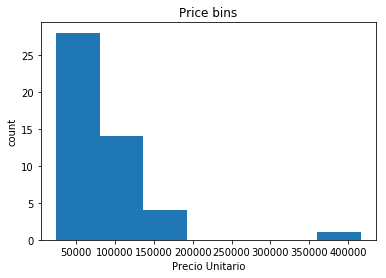

In [74]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(BsAs_merged["Precio Unitario"],bins=7)

# set x/y labels and plot title
plt.pyplot.xlabel("Precio Unitario")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")

In [75]:
bins = np.linspace(min(BsAs_merged["Precio Unitario"]), max(BsAs_merged["Precio Unitario"]), 8)
bins

array([ 24168.39506173,  80144.33862434, 136120.28218695, 192096.22574956,
       248072.16931217, 304048.11287478, 360024.05643739, 416000.        ])

In [76]:
group_names = ['Low level 1', 'Low level 2', 'Average level 1', 'Average level 2','Above Average','High level 1','High level 2']

In [77]:
BsAs_merged['Price-Categories'] = pd.cut(BsAs_merged['Precio Unitario'], bins, labels=group_names, include_lowest=True )
BsAs_merged[['Precio Unitario','Price-Categories']].head()

,Precio Unitario,Price-Categories
0,55415.131023,Low level 1
1,87864.006012,Low level 2
2,73207.797399,Low level 1
3,33233.775316,Low level 1
4,140041.294210,Average level 1


## Cluster bins

### Creating 4 bins for clusters

Text(0.5, 1.0, 'Cluster Labels')

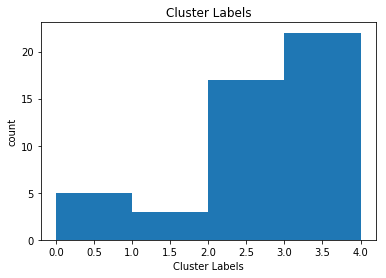

In [78]:
plt.pyplot.hist(BsAs_merged["Cluster Labels"],bins=4)

# set x/y labels and plot title
plt.pyplot.xlabel("Cluster Labels")
plt.pyplot.ylabel("count")
plt.pyplot.title("Cluster Labels")

In [79]:
bins = np.linspace(min(BsAs_merged["Cluster Labels"]), max(BsAs_merged["Cluster Labels"]), 7)
bins

array([0.        , 0.66666667, 1.33333333, 2.        , 2.66666667,
       3.33333333, 4.        ])

In [80]:
group_names = ['Mixed Social Venues','Hotels and Social Venues','Stores and seafood restaurants','Pubs and Historic places', 'Sports and Athletics','Restaurants and Bars']

In [83]:
BsAs_merged['Cluster-Category'] = pd.cut(BsAs_merged['Cluster Labels'], bins, labels=group_names, include_lowest=True )
BsAs_merged[['Cluster Labels','Cluster-Category']]

,Cluster Labels,Cluster-Category
0,2,Stores and seafood restaurants
1,4,Restaurants and Bars
2,2,Stores and seafood restaurants
3,1,Hotels and Social Venues
4,4,Restaurants and Bars
5,1,Hotels and Social Venues
6,1,Hotels and Social Venues
7,4,Restaurants and Bars
8,4,Restaurants and Bars
9,4,Restaurants and Bars


## Examining the Clusters

In [82]:
BsAs_merged[BsAs_merged['Cluster Labels']==0]

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category
14,LINIERS,-58.519932,-34.644548,284.000000,1.728095e+07,9.0,1377.615385,60848.429036,0,Ice Cream Shop,Argentinian Restaurant,Bus Stop,Sushi Restaurant,BBQ Joint,Plaza,Hobby Shop,History Museum,Fish Market,Fast Food Restaurant,Low level 1,Mixed Social Venues
22,PARQUE AVELLANEDA,-58.479786,-34.645006,429.909091,2.229218e+07,9.0,1393.636364,51853.245929,0,Park,History Museum,Toll Booth,Athletics & Sports,Electronics Store,Flower Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Low level 1,Mixed Social Venues
38,VILLA GRAL. MITRE,-58.466075,-34.609739,586.266667,2.089347e+07,11.0,1314.133333,35638.173755,0,Bus Stop,Sandwich Place,Intersection,Italian Restaurant,Supermarket,Gym,Café,Outdoor Sculpture,Tennis Court,Women's Store,Low level 1,Mixed Social Venues
39,VILLA LUGANO,-58.481793,-34.670234,506.250000,1.223525e+07,8.0,1423.750000,24168.395062,0,Ice Cream Shop,Gym,Argentinian Restaurant,Bus Stop,Flower Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Fabric Shop,Low level 1,Mixed Social Venues
43,VILLA REAL,-58.526380,-34.618903,287.333333,1.311237e+07,10.0,1406.000000,45634.686775,0,Bus Stop,Tennis Court,Gym,Bus Station,Sports Club,Metro Station,Bakery,Athletics & Sports,Plaza,Intersection,Low level 1,Mixed Social Venues


In [54]:

BsAs_merged[BsAs_merged['Cluster Labels']==1]

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category
22,PARQUE AVELLANEDA,-58.479786,-34.645006,429.909091,2.229218e+07,9.0,1393.636364,51853.245929,1,Park,History Museum,Toll Booth,Athletics & Sports,Electronics Store,Flower Shop,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Low level 1,Hotels and Social Venues


In [55]:
BsAs_merged[BsAs_merged['Cluster Labels']==2]

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category
4,BELGRANO,-58.456588,-34.559806,441.076923,6.176898e+07,13.0,1348.000000,140041.294210,2,Ice Cream Shop,Pizza Place,Bakery,Coffee Shop,Argentinian Restaurant,Café,Fast Food Restaurant,Tea Room,Bookstore,Chinese Restaurant,Average level 1,Stores and seafood restaurants
18,NUEVA POMPEYA,-58.414972,-34.643317,679.111111,1.027767e+08,4.0,1385.333333,151340.068717,2,Ice Cream Shop,Tennis Court,Nightclub,Thrift / Vintage Store,Cuban Restaurant,Creperie,Fish Market,Fast Food Restaurant,Farmers Market,Cosmetics Shop,Average level 1,Stores and seafood restaurants
19,NUÃ‘EZ,-58.462420,-34.551153,266.200000,3.355440e+07,13.0,1429.000000,126049.586777,2,Café,Brewery,Pizza Place,Argentinian Restaurant,Coffee Shop,Gym,Ice Cream Shop,Pharmacy,Restaurant,Beer Bar,Low level 2,Stores and seafood restaurants
20,NUâ”œÃ¦EZ,-58.465616,-34.550308,391.166667,6.829033e+07,13.0,1354.333333,174581.167448,2,Pizza Place,Ice Cream Shop,Restaurant,Coffee Shop,Plaza,Beer Bar,BBQ Joint,Brewery,Deli / Bodega,Gym,Average level 1,Stores and seafood restaurants
21,PALERMO,-58.425513,-34.586056,427.645833,5.783798e+07,14.0,1331.395833,135247.391241,2,Argentinian Restaurant,Bookstore,Hotel,Wine Shop,Ice Cream Shop,Accessories Store,Bar,Speakeasy,Clothing Store,Wine Bar,Low level 2,Stores and seafood restaurants
27,RECOLETA,-58.407499,-34.595966,314.333333,5.033256e+07,2.0,1296.666667,160124.779074,2,Pizza Place,Café,Argentinian Restaurant,Bakery,Gym,Ice Cream Shop,Sandwich Place,Hotel,Pharmacy,Miscellaneous Shop,Average level 1,Stores and seafood restaurants
32,SAN TELMO,-58.370985,-34.624815,461.600000,6.283060e+07,1.0,1316.800000,136114.818024,2,Argentinian Restaurant,Restaurant,Bar,Pizza Place,Ice Cream Shop,Café,BBQ Joint,Residential Building (Apartment / Condo),Tapas Restaurant,Pharmacy,Low level 2,Stores and seafood restaurants
35,VILLA CRESPO,-58.443384,-34.599397,315.933333,3.721116e+07,15.0,1402.822222,117781.683900,2,Pizza Place,Café,Argentinian Restaurant,Coffee Shop,Ice Cream Shop,Dance Studio,Bakery,Gym,Soccer Field,Breakfast Spot,Low level 2,Stores and seafood restaurants


In [56]:
BsAs_merged[BsAs_merged['Cluster Labels']==3]

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category
0,AGRONOMIA,-58.496394,-34.594753,473.200000,2.622244e+07,15.0,1353.200000,55415.131023,3,Bar,Café,Coffee Shop,Pub,Steakhouse,Bakery,Restaurant,German Restaurant,Sports Club,Ice Cream Shop,Low level 1,Pubs and Historic places
2,BALVANERA,-58.403610,-34.611803,555.219512,4.064640e+07,3.0,1272.463415,73207.797399,3,Café,Pizza Place,Ice Cream Shop,BBQ Joint,Peruvian Restaurant,Rock Club,Electronics Store,Bus Stop,Fast Food Restaurant,Social Club,Low level 1,Pubs and Historic places
12,FLORES,-58.463752,-34.628638,648.386364,3.250553e+07,7.0,1396.363636,50132.964002,3,Ice Cream Shop,Café,Pharmacy,Restaurant,Pizza Place,Fish Market,Noodle House,Movie Theater,Lounge,Electronics Store,Low level 1,Pubs and Historic places
13,FLORESTA,-58.482018,-34.630932,352.454545,3.400759e+07,10.0,1347.636364,96487.877225,3,Deli / Bodega,Ice Cream Shop,Plaza,Supermarket,Café,Restaurant,Cheese Shop,Argentinian Restaurant,Pharmacy,Dance Studio,Low level 2,Pubs and Historic places
15,MATADEROS,-58.502471,-34.656764,312.320000,1.125827e+07,9.0,1415.040000,36047.233607,3,Pizza Place,Dessert Shop,BBQ Joint,Sports Club,Restaurant,Women's Store,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Low level 1,Pubs and Historic places
16,MONTE CASTRO,-58.502223,-34.618357,391.846667,1.969089e+07,10.0,1373.066667,50251.526958,3,Café,Ice Cream Shop,Plaza,Coffee Shop,Bus Stop,Empanada Restaurant,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Low level 1,Pubs and Historic places
23,PARQUE CHACABUCO,-58.435210,-34.636046,458.473684,1.860004e+07,7.0,1351.842105,40569.486856,3,Pizza Place,Pharmacy,Café,Ice Cream Shop,Hobby Shop,Breakfast Spot,Coffee Shop,Gym,Bar,English Restaurant,Low level 1,Pubs and Historic places
25,PARQUE PATRICIOS,-58.400054,-34.636059,335.882353,2.391455e+07,4.0,1330.176471,71199.194396,3,Pizza Place,Restaurant,Ice Cream Shop,Empanada Restaurant,Argentinian Restaurant,Burger Joint,Athletics & Sports,Park,Fish Market,Fast Food Restaurant,Low level 1,Pubs and Historic places
26,PATERNAL,-58.463932,-34.601810,284.714286,1.719883e+07,15.0,1296.714286,60407.325640,3,Pizza Place,Art Gallery,Gym / Fitness Center,Pharmacy,Convenience Store,Deli / Bodega,Café,Bus Stop,Breakfast Spot,BBQ Joint,Low level 1,Pubs and Historic places
29,SAAVEDRA,-58.486905,-34.552515,290.863636,2.018053e+07,12.0,1391.318182,69381.418972,3,Ice Cream Shop,Market,Pharmacy,Restaurant,Doctor's Office,Steakhouse,Bakery,General Entertainment,Cosmetics Shop,Gym / Fitness Center,Low level 1,Pubs and Historic places


In [57]:
BsAs_merged[BsAs_merged['Cluster Labels']==4]

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category
28,RETIRO,-58.37431,-34.595888,280.0,116480000.0,1.0,1170.0,416000.0,4,Coffee Shop,Hotel,Café,Argentinian Restaurant,Salad Place,Restaurant,Ice Cream Shop,Italian Restaurant,Gym / Fitness Center,Fast Food Restaurant,High level 2,Sports and Athletics


In [58]:
BsAs_merged[BsAs_merged['Cluster Labels']==5]

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category
1,ALMAGRO,-58.421047,-34.605220,386.354839,3.394668e+07,5.0,1309.483871,87864.006012,5,Café,Pizza Place,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Gym,Restaurant,Ice Cream Shop,Cheese Shop,Flower Shop,Performing Arts Venue,Low level 2,Restaurants and Bars
3,BARRACAS,-58.378305,-34.643250,1118.111111,3.715905e+07,4.0,1327.777778,33233.775316,5,Plaza,Soccer Field,Argentinian Restaurant,Bakery,Café,English Restaurant,Flower Shop,Fish Market,Fast Food Restaurant,Farmers Market,Low level 1,Restaurants and Bars
7,CABALLITO,-58.443060,-34.615995,501.355556,4.391917e+07,6.0,1376.933333,87600.842161,5,Grocery Store,Pizza Place,Plaza,Restaurant,Bakery,Gym,Ice Cream Shop,Bus Stop,Fried Chicken Joint,Soccer Stadium,Low level 2,Restaurants and Bars
8,CHACARITA,-58.448492,-34.588377,317.411765,2.738195e+07,15.0,1344.352941,86266.326909,5,Café,Bakery,Argentinian Restaurant,Restaurant,Tapas Restaurant,Office,Steakhouse,Sporting Goods Shop,Latin American Restaurant,Spanish Restaurant,Low level 2,Restaurants and Bars
9,COGHLAN,-58.473478,-34.559571,373.000000,3.524752e+07,12.0,1353.000000,94497.363718,5,Pizza Place,Bus Station,Food Service,Bakery,Brewery,Argentinian Restaurant,History Museum,Café,Gym / Fitness Center,BBQ Joint,Low level 2,Restaurants and Bars
10,COLEGIALES,-58.450934,-34.573363,388.166667,3.756629e+07,13.0,1391.250000,96778.767711,5,Bakery,Argentinian Restaurant,Pizza Place,Coffee Shop,BBQ Joint,Brewery,Sushi Restaurant,Beer Bar,Supermarket,Sports Club,Low level 2,Restaurants and Bars
11,CONSTITUCION,-58.385830,-34.621959,431.166667,3.287550e+07,1.0,1243.083333,76247.777348,5,Hostel,Soccer Field,Ice Cream Shop,Theme Restaurant,Plaza,Pool,Café,BBQ Joint,Hotel,Argentinian Restaurant,Low level 1,Restaurants and Bars
17,MONTSERRAT,-58.380467,-34.613513,1121.000000,8.878027e+07,1.0,1305.076923,79197.385576,5,Spanish Restaurant,Hotel,Nightclub,Café,Sandwich Place,Camera Store,Hostel,Argentinian Restaurant,Pizza Place,Italian Restaurant,Low level 1,Restaurants and Bars
24,PARQUE CHAS,-58.476873,-34.586373,367.777778,2.038840e+07,15.0,1402.444444,55436.737160,5,Plaza,Pizza Place,Burger Joint,Leather Goods Store,Café,Grocery Store,Bakery,Women's Store,Empanada Restaurant,Fast Food Restaurant,Low level 1,Restaurants and Bars
31,SAN NICOLAS,-58.382124,-34.604257,506.000000,4.634170e+07,1.0,1293.600000,91584.387352,5,Hotel,Café,Coffee Shop,Theater,Pizza Place,Argentinian Restaurant,Bookstore,Gym / Fitness Center,Bakery,Comic Shop,Low level 2,Restaurants and Bars


In [59]:
BsAs_merged[BsAs_merged['Cluster Labels']==6]

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category


In [60]:
BsAs_merged[BsAs_merged['Price-Categories']=='Low level 1']

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category
0,AGRONOMIA,-58.496394,-34.594753,473.200000,2.622244e+07,15.0,1353.200000,55415.131023,3,Bar,Café,Coffee Shop,Pub,Steakhouse,Bakery,Restaurant,German Restaurant,Sports Club,Ice Cream Shop,Low level 1,Pubs and Historic places
2,BALVANERA,-58.403610,-34.611803,555.219512,4.064640e+07,3.0,1272.463415,73207.797399,3,Café,Pizza Place,Ice Cream Shop,BBQ Joint,Peruvian Restaurant,Rock Club,Electronics Store,Bus Stop,Fast Food Restaurant,Social Club,Low level 1,Pubs and Historic places
3,BARRACAS,-58.378305,-34.643250,1118.111111,3.715905e+07,4.0,1327.777778,33233.775316,5,Plaza,Soccer Field,Argentinian Restaurant,Bakery,Café,English Restaurant,Flower Shop,Fish Market,Fast Food Restaurant,Farmers Market,Low level 1,Restaurants and Bars
5,BOCA,-58.363795,-34.638008,883.857143,4.723700e+07,4.0,1311.000000,53444.157104,0,Argentinian Restaurant,Café,BBQ Joint,Art Gallery,Restaurant,Bistro,Gift Shop,Seafood Restaurant,Pedestrian Plaza,Historic Site,Low level 1,Mixed Social Venues
6,BOEDO,-58.419036,-34.630797,360.800000,2.819356e+07,5.0,1279.200000,78141.790466,0,Argentinian Restaurant,Soccer Field,Ice Cream Shop,BBQ Joint,Pizza Place,Intersection,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Low level 1,Mixed Social Venues
11,CONSTITUCION,-58.385830,-34.621959,431.166667,3.287550e+07,1.0,1243.083333,76247.777348,5,Hostel,Soccer Field,Ice Cream Shop,Theme Restaurant,Plaza,Pool,Café,BBQ Joint,Hotel,Argentinian Restaurant,Low level 1,Restaurants and Bars
12,FLORES,-58.463752,-34.628638,648.386364,3.250553e+07,7.0,1396.363636,50132.964002,3,Ice Cream Shop,Café,Pharmacy,Restaurant,Pizza Place,Fish Market,Noodle House,Movie Theater,Lounge,Electronics Store,Low level 1,Pubs and Historic places
14,LINIERS,-58.519932,-34.644548,284.000000,1.728095e+07,9.0,1377.615385,60848.429036,0,Ice Cream Shop,Argentinian Restaurant,Bus Stop,Sushi Restaurant,BBQ Joint,Plaza,Hobby Shop,History Museum,Fish Market,Fast Food Restaurant,Low level 1,Mixed Social Venues
15,MATADEROS,-58.502471,-34.656764,312.320000,1.125827e+07,9.0,1415.040000,36047.233607,3,Pizza Place,Dessert Shop,BBQ Joint,Sports Club,Restaurant,Women's Store,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Low level 1,Pubs and Historic places
16,MONTE CASTRO,-58.502223,-34.618357,391.846667,1.969089e+07,10.0,1373.066667,50251.526958,3,Café,Ice Cream Shop,Plaza,Coffee Shop,Bus Stop,Empanada Restaurant,Fish Market,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Low level 1,Pubs and Historic places


In [61]:
BsAs_merged[BsAs_merged['Price-Categories']=='Low level 2']

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category
1,ALMAGRO,-58.421047,-34.605220,386.354839,3.394668e+07,5.0,1309.483871,87864.006012,5,Café,Pizza Place,Argentinian Restaurant,Vegetarian / Vegan Restaurant,Gym,Restaurant,Ice Cream Shop,Cheese Shop,Flower Shop,Performing Arts Venue,Low level 2,Restaurants and Bars
7,CABALLITO,-58.443060,-34.615995,501.355556,4.391917e+07,6.0,1376.933333,87600.842161,5,Grocery Store,Pizza Place,Plaza,Restaurant,Bakery,Gym,Ice Cream Shop,Bus Stop,Fried Chicken Joint,Soccer Stadium,Low level 2,Restaurants and Bars
8,CHACARITA,-58.448492,-34.588377,317.411765,2.738195e+07,15.0,1344.352941,86266.326909,5,Café,Bakery,Argentinian Restaurant,Restaurant,Tapas Restaurant,Office,Steakhouse,Sporting Goods Shop,Latin American Restaurant,Spanish Restaurant,Low level 2,Restaurants and Bars
9,COGHLAN,-58.473478,-34.559571,373.000000,3.524752e+07,12.0,1353.000000,94497.363718,5,Pizza Place,Bus Station,Food Service,Bakery,Brewery,Argentinian Restaurant,History Museum,Café,Gym / Fitness Center,BBQ Joint,Low level 2,Restaurants and Bars
10,COLEGIALES,-58.450934,-34.573363,388.166667,3.756629e+07,13.0,1391.250000,96778.767711,5,Bakery,Argentinian Restaurant,Pizza Place,Coffee Shop,BBQ Joint,Brewery,Sushi Restaurant,Beer Bar,Supermarket,Sports Club,Low level 2,Restaurants and Bars
13,FLORESTA,-58.482018,-34.630932,352.454545,3.400759e+07,10.0,1347.636364,96487.877225,3,Deli / Bodega,Ice Cream Shop,Plaza,Supermarket,Café,Restaurant,Cheese Shop,Argentinian Restaurant,Pharmacy,Dance Studio,Low level 2,Pubs and Historic places
19,NUÃ‘EZ,-58.462420,-34.551153,266.200000,3.355440e+07,13.0,1429.000000,126049.586777,2,Café,Brewery,Pizza Place,Argentinian Restaurant,Coffee Shop,Gym,Ice Cream Shop,Pharmacy,Restaurant,Beer Bar,Low level 2,Stores and seafood restaurants
21,PALERMO,-58.425513,-34.586056,427.645833,5.783798e+07,14.0,1331.395833,135247.391241,2,Argentinian Restaurant,Bookstore,Hotel,Wine Shop,Ice Cream Shop,Accessories Store,Bar,Speakeasy,Clothing Store,Wine Bar,Low level 2,Stores and seafood restaurants
30,SAN CRISTOBAL,-58.400699,-34.622531,190.000000,1.719925e+07,3.0,1235.416667,90522.368421,3,Ice Cream Shop,Argentinian Restaurant,Metro Station,Pharmacy,Soccer Field,Tennis Court,Café,Convenience Store,Dessert Shop,Furniture / Home Store,Low level 2,Pubs and Historic places
31,SAN NICOLAS,-58.382124,-34.604257,506.000000,4.634170e+07,1.0,1293.600000,91584.387352,5,Hotel,Café,Coffee Shop,Theater,Pizza Place,Argentinian Restaurant,Bookstore,Gym / Fitness Center,Bakery,Comic Shop,Low level 2,Restaurants and Bars


In [62]:
BsAs_merged[BsAs_merged['Price-Categories']=='Average level 1']

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category
4,BELGRANO,-58.456588,-34.559806,441.076923,6.176898e+07,13.0,1348.000000,140041.294210,2,Ice Cream Shop,Pizza Place,Bakery,Coffee Shop,Argentinian Restaurant,Café,Fast Food Restaurant,Tea Room,Bookstore,Chinese Restaurant,Average level 1,Stores and seafood restaurants
18,NUEVA POMPEYA,-58.414972,-34.643317,679.111111,1.027767e+08,4.0,1385.333333,151340.068717,2,Ice Cream Shop,Tennis Court,Nightclub,Thrift / Vintage Store,Cuban Restaurant,Creperie,Fish Market,Fast Food Restaurant,Farmers Market,Cosmetics Shop,Average level 1,Stores and seafood restaurants
20,NUâ”œÃ¦EZ,-58.465616,-34.550308,391.166667,6.829033e+07,13.0,1354.333333,174581.167448,2,Pizza Place,Ice Cream Shop,Restaurant,Coffee Shop,Plaza,Beer Bar,BBQ Joint,Brewery,Deli / Bodega,Gym,Average level 1,Stores and seafood restaurants
27,RECOLETA,-58.407499,-34.595966,314.333333,5.033256e+07,2.0,1296.666667,160124.779074,2,Pizza Place,Café,Argentinian Restaurant,Bakery,Gym,Ice Cream Shop,Sandwich Place,Hotel,Pharmacy,Miscellaneous Shop,Average level 1,Stores and seafood restaurants


In [63]:
BsAs_merged[BsAs_merged['Price-Categories']=='Average level 2']

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category


In [64]:
BsAs_merged[BsAs_merged['Price-Categories']=='High level 1']

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category


In [65]:
BsAs_merged[BsAs_merged['Price-Categories']=='High level 2']

,barrio,long,lat,m2total,precioars,comuna,codigo_postal,Precio Unitario,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Price-Categories,Cluster-Category
28,RETIRO,-58.37431,-34.595888,280.0,116480000.0,1.0,1170.0,416000.0,4,Coffee Shop,Hotel,Café,Argentinian Restaurant,Salad Place,Restaurant,Ice Cream Shop,Italian Restaurant,Gym / Fitness Center,Fast Food Restaurant,High level 2,Sports and Athletics


In [ ]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BsAs_merged['lat'],BsAs_merged['long'], BsAs_merged['barrio'], BsAs_merged['Price-Categories']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters